## **Q1. On an average, how often do people order from Instacart?**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

import seaborn as sns
color = sns.color_palette()
%matplotlib inline



In [4]:
orders = pd.read_csv('./instacart-market-basket-analysis/orders.csv')

In [5]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [6]:

# plan: take the average of the row days_since_prior_order, but don't include NaNs.
# pandas ignores NaNs while taking average, so we only need to call the average method on the series.

print('On an average, people order once every ', orders['days_since_prior_order'].mean(), 'days')

On an average, people order once every  11.114836226863012 days



## **Q2. What product was ordered most often?**

In [8]:
# plan - we use two tables: order_products__train.csv and order_products__prior.csv. We assume these have different values, and we check if they are the same. Best to check the kaggle dataset for any hints as to what these files have.

# for simplicity, we take just one file for this question - prior.

order_products_prior = pd.read_csv('./instacart-market-basket-analysis/order_products__prior.csv')

In [9]:
# the table looks like so:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [10]:
products = pd.read_csv('./instacart-market-basket-analysis/products.csv')
aisles = pd.read_csv('./instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv('./instacart-market-basket-analysis/departments.csv')


In [11]:
# for each order, we want each product to be considered only once in our calculations. So we should remove duplicates of the same order_id and product_id for this question.
df = order_products_prior.drop_duplicates(subset=['order_id', 'product_id'])

df_with_product_description = df.merge(products, on = 'product_id', how='inner')


In [12]:
df_with_product_description

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16
...,...,...,...,...,...,...,...
32434484,3265099,43492,3,0,Gourmet Burger Seasoning,104,13
32434485,3361945,43492,19,0,Gourmet Burger Seasoning,104,13
32434486,3267201,33097,2,0,Piquillo & Jalapeno Bruschetta,81,15
32434487,3393151,38977,32,0,Original Jerky,100,21


In [13]:
# now if we group by product_id and show count along with product_id, that should be quite interesting
# but product_id tells us nothing, so best to also join the result to products table.
df_with_product_description.groupby(['product_name']).count().sort_values(by = 'order_id', ascending=False)['order_id']

product_name
Banana                                                    472565
Bag of Organic Bananas                                    379450
Organic Strawberries                                      264683
Organic Baby Spinach                                      241921
Organic Hass Avocado                                      213584
                                                           ...  
Pure Performance Restorative Shampoo Chamomile & Honey         1
Lindor Peppermint White Chocolate Truffles                     1
Dynostix Rawhide Chew With Meat                                1
Max White With Polishing Star Soft Toothbrush                  1
Cajun Sides Dirty Rice                                         1
Name: order_id, Length: 49677, dtype: int64

C:\Users\patil\anaconda3\envs\ECE_143\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


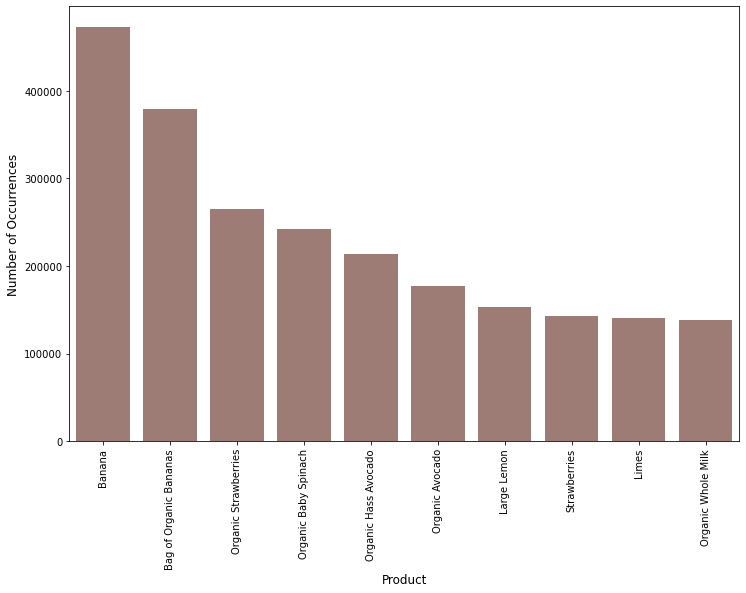

In [14]:
cnt_srs = df_with_product_description['product_name'].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## **Q3. At what time during the day do people order most often?**

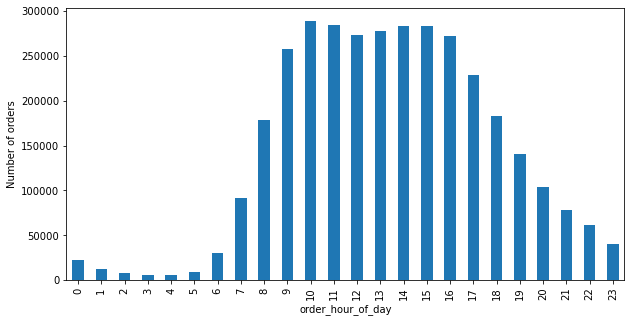

In [15]:
# plan - take orders table and group by order time of day
time_of_day = orders.groupby(by='order_hour_of_day').count().sort_values(by='order_hour_of_day', ascending=True)
plt.figure(figsize=(10,5))
time_of_day['order_id'].plot.bar()
plt.ylabel('Number of orders');

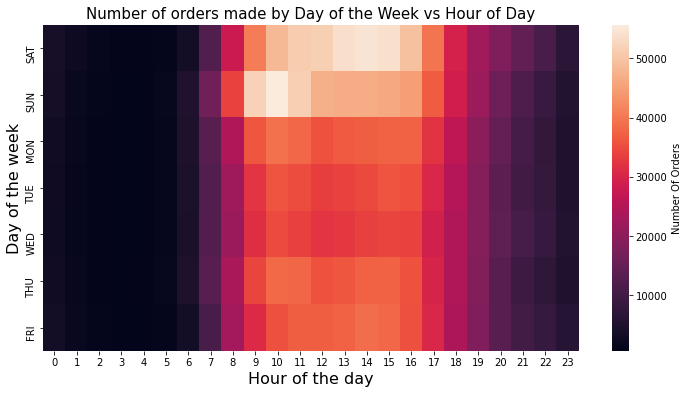

In [33]:
grouped_data = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_data = grouped_data.pivot('order_dow', 'order_hour_of_day', 'order_number')
    
plt.figure(figsize=(12,6))
hour_of_day = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14','15','16', '17', '18', '19','20', '21', '22', '23']
dow = ['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU','FRI']

ax = sns.heatmap(grouped_data, xticklabels=hour_of_day, yticklabels=dow, cbar_kws={'label': 'Number Of Orders'})

# cbar = ax.collections[0].colorbar
# cbar.set_ticks([0, 500, 1000, 1500, 2000, 2500])
# cbar.set_ticklabels(['0','0.5','1.0','1.5','2.0','2.5'])
# ax.figure.axes[-1].yaxis.label.set_size(15)
# ax.figure.axes[0].yaxis.label.set_size(15)
# ax.figure.axes[0].xaxis.label.set_size(15)
ax.set_xlabel('Hour of the day', fontsize=16)
ax.set_ylabel('Day of the week', fontsize=16)

# ax.set(xlabel='Hour of Day', ylabel= "Day of the Week")
ax.set_title("Number of orders made by Day of the Week vs Hour of Day", fontsize=15)
plt.show()

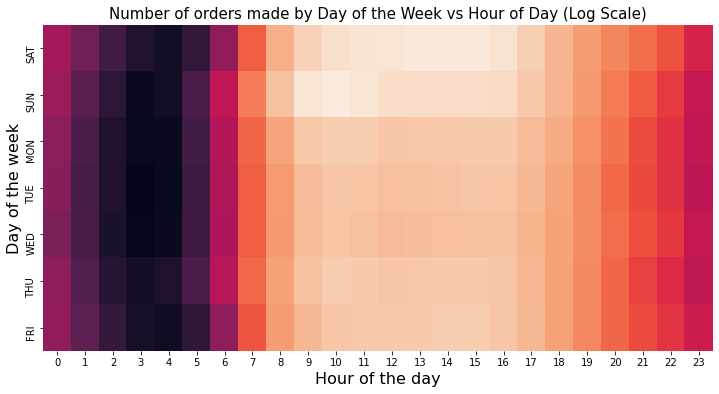

In [41]:
grouped_data = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_data = grouped_data.pivot('order_dow', 'order_hour_of_day', 'order_number')
    
plt.figure(figsize=(12,6))
hour_of_day = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14','15','16', '17', '18', '19','20', '21', '22', '23']
dow = ['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU','FRI']

ax = sns.heatmap(np.log(grouped_data), xticklabels=hour_of_day, yticklabels=dow, cbar = False)

# cbar = ax.collections[0].colorbar
# cbar.set_ticks([0, 500, 1000, 1500, 2000, 2500])
# cbar.set_ticklabels(['0','0.5','1.0','1.5','2.0','2.5'])
# ax.figure.axes[-1].yaxis.label.set_size(15)
# ax.figure.axes[0].yaxis.label.set_size(15)
# ax.figure.axes[0].xaxis.label.set_size(15)
ax.set_xlabel('Hour of the day', fontsize=16)
ax.set_ylabel('Day of the week', fontsize=16)

# ax.set(xlabel='Hour of Day', ylabel= "Day of the Week")
ax.set_title("Number of orders made by Day of the Week vs Hour of Day (Log Scale)", fontsize=15)
plt.show()

The heatmap above demonstrates that purchases are most frequently made during Saturday afternoon (3PM) and Sunday morning (10AM)


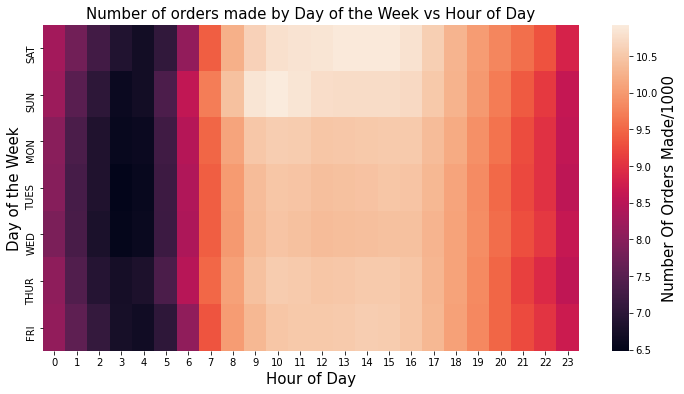

In [23]:
grouped_data = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_data = grouped_data.pivot('order_dow', 'order_hour_of_day', 'order_number')
    
plt.figure(figsize=(12,6))
hour_of_day = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14','15','16', '17', '18', '19','20', '21', '22', '23']
dow = ['SAT', 'SUN', 'MON', 'TUES', 'WED', 'THUR','FRI']
#log_norm = LogNorm(vmin=grouped_data.min().min(), vmax=grouped_data.max().max())
#cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(grouped_data.min().min())), 1+math.ceil(math.log10(grouped_data.max().max())))]
#cbar_ticks = ['2.5', '5.0', '7.5', '10.0','12.5','15.0', '17.5','20.0']


# ax = sns.heatmap(grouped_data, xticklabels=hour_of_day, yticklabels=dow, norm=LogNorm(), cbar_kws={'label': '# Of Orders Made', 'ticks':cbar_ticks})
ax = sns.heatmap(np.log(abs(grouped_data)), xticklabels=hour_of_day, yticklabels=dow, cbar_kws={'label': 'Number Of Orders Made/1000'})
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 500, 1000, 1500, 2000, 2500])
cbar.set_ticklabels(['0','0.5','1.0','1.5','2.0','2.5'])
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.figure.axes[0].yaxis.label.set_size(15)
ax.figure.axes[0].xaxis.label.set_size(15)


ax.set(xlabel='Hour of Day', ylabel= "Day of the Week")
ax.set_title("Number of orders made by Day of the Week vs Hour of Day", fontsize=15)
plt.show()

In [18]:
import math